# Projeto - Machine Failure
No presente projeto será realizado a análise exploratória dos dados recolhidos de um sistema de monitoramento de falhas em maquinas. Aplicando conceitos de ciencia de dados, se chegará a algumas conclusões a respeito destas falhas, auxiliando na tomada de decisão dos gestores (fictícios) da área.<br>
A base de dados possui as seguintes colunas: <br>
**Report.date**: data do reporte; <br>
**Mlocation**: localização da máquina;<br>
**Zone**: zona onde a máquina está localizada;<br>
**Start.date.time**: data e horário da falha da máquina;<br>
**End.date.time**: data e horária que a máquina voltou a funcionar;<br>
**Notification.sent**: data e horário que o sistema de monitoramento notificou a falha;<br>
**Off-line.duration**: quando tempo a maquina ficou off-line;<br>
**High.Level.Reason**: razão da falha;<br><br><br>
Agora será importado as bibliotecas e a base de dados utilizada. 


In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('MFAR.csv')
df.head()

,Report.date,Mlocation,Zone,Start.date.time,End.date.time,Notification.sent,Off-line.duration,High.Level.Reason
0,2018-09-01T00:00:00Z,AM0035,ZoneHASK,2018-09-01T07:49:00Z,2018-09-01T09:40:00Z,2018-09-01T08:10:00Z,1.850000,Most.p(CP_OFF)
1,2018-09-01T00:00:00Z,NM0208,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)
2,2018-09-01T00:00:00Z,NM0217,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)
3,2018-09-01T00:00:00Z,AM0015,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF)
4,2018-09-01T00:00:00Z,GM0066,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF)


Vamos utilizar o método **".info()"** para verificar o tamanho do DataFrame, e para verificar se o mesmo possui algum dado faltante, vamos utilizar um mapa de calor da biblioteca **seaborn**.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15626 entries, 0 to 15625
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Report.date        15626 non-null  object 
 1   Mlocation          15626 non-null  object 
 2   Zone               15626 non-null  object 
 3   Start.date.time    15626 non-null  object 
 4   End.date.time      15626 non-null  object 
 5   Notification.sent  15626 non-null  object 
 6   Off-line.duration  15626 non-null  float64
 7   High.Level.Reason  15626 non-null  object 
dtypes: float64(1), object(7)
memory usage: 976.8+ KB


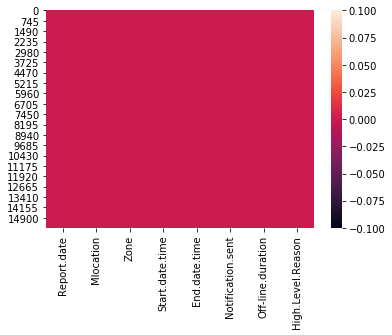

In [4]:
sns.heatmap(df.isnull())

# Tratando os dados das colunas relacionadas ao tempo.
Nas colunas relacionadas ao tempo, temos dados de data e hora, que serião interessantes de serem trabalhados separadamente. Para separar a data do horário, iremos aplicar um função **lambda** e assim criar novas colunas com os dados **"splitados"**;<br><br> Antes vamos renomear as colunas para facilitar este processo. 

In [4]:
df.head(2)

,Report.date,Mlocation,Zone,Start.date.time,End.date.time,Notification.sent,Off-line.duration,High.Level.Reason
0,2018-09-01T00:00:00Z,AM0035,ZoneHASK,2018-09-01T07:49:00Z,2018-09-01T09:40:00Z,2018-09-01T08:10:00Z,1.850000,Most.p(CP_OFF)
1,2018-09-01T00:00:00Z,NM0208,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF)


In [5]:
df.rename(columns={'Report.date':'ReportDate', 'Start.date.time':'StartDT','End.date.time':'NotSent',"Notification.sent":'Nsent' }, inplace=True)

In [13]:
df.columns

Index(['ReportDate', 'Mlocation', 'Zone', 'StartDT', 'NotSent', 'Nsent',
       'Off-line.duration', 'High.Level.Reason'],
      dtype='object')

Agora vamos aplicar as funções e assim criar novas colunas para o DataFrame.

In [28]:
df['Data de Reporte'] = df['ReportDate'].apply(lambda ReportDate: ReportDate.split('T')[0])
df['Horário de Reporte'] = df['ReportDate'].apply(lambda ReportDate: ReportDate.split('T')[1])
df['Start Hour'] = df['StartDT'].apply(lambda StartDT: StartDT.split('T')[1])
df['End Hour'] = df['NotSent'].apply(lambda NotSent: NotSent.split('T')[1])
df['Notification Hour '] = df['Nsent'].apply(lambda Nsent: Nsent.split('T')[1])

In [15]:
df.head()

,ReportDate,Mlocation,Zone,StartDT,NotSent,Nsent,Off-line.duration,High.Level.Reason,Data de Reporte,Horário de Reporte,Start Hour,End Hour,Notification Hour
0,2018-09-01T00:00:00Z,AM0035,ZoneHASK,2018-09-01T07:49:00Z,2018-09-01T09:40:00Z,2018-09-01T08:10:00Z,1.850000,Most.p(CP_OFF),2018-09-01,00:00:00Z,07:49:00Z,09:40:00Z,08:10:00Z
1,2018-09-01T00:00:00Z,NM0208,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF),2018-09-01,00:00:00Z,11:43:00Z,12:08:00Z,12:03:00Z
2,2018-09-01T00:00:00Z,NM0217,ZoneBMAR,2018-09-01T11:43:00Z,2018-09-01T12:08:00Z,2018-09-01T12:03:00Z,0.416667,Most.p(CP_OFF),2018-09-01,00:00:00Z,11:43:00Z,12:08:00Z,12:03:00Z
3,2018-09-01T00:00:00Z,AM0015,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF),2018-09-01,00:00:00Z,11:20:00Z,14:43:00Z,11:40:00Z
4,2018-09-01T00:00:00Z,GM0066,ZoneBMAR,2018-09-01T11:20:00Z,2018-09-01T14:43:00Z,2018-09-01T11:40:00Z,3.383333,Most.p(CP_OFF),2018-09-01,00:00:00Z,11:20:00Z,14:43:00Z,11:40:00Z


In [17]:
df.shape

(15626, 13)

Agora ficará muito mais facil trabalhar os dados relativos ao tempo. 

Vamos analisar quais são as datas de maior número de reportes (para facilitar a visualizaação graficamente, vamos pegar apenas as 10 primeiras datas . 

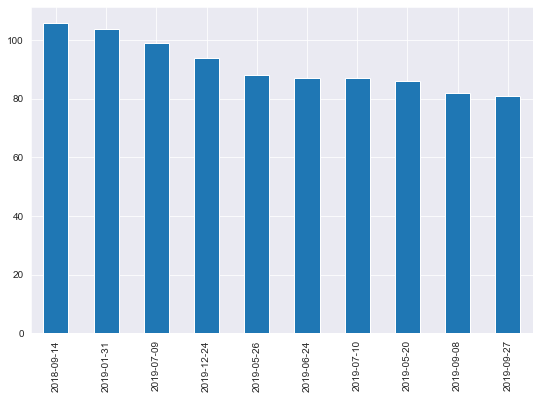

In [8]:
sns.set_style('darkgrid')
df['Data de Reporte'].value_counts().head(10).plot(kind='bar', figsize=(9,6))

Agora vamos avaliar o horário em que a maquina falhou.

In [13]:
df['Start Hour'].value_counts().head(20)

10:05:00Z    185
10:15:00Z    172
10:10:00Z    157
10:00:00Z    138
11:30:00Z    118
10:30:00Z    107
11:00:00Z    106
11:45:00Z    106
12:50:00Z     93
11:15:00Z     90
16:50:00Z     85
12:45:00Z     83
10:55:00Z     82
09:40:00Z     82
15:00:00Z     80
18:35:00Z     80
12:30:00Z     79
11:40:00Z     79
10:45:00Z     79
10:50:00Z     76
Name: Start Hour, dtype: int64

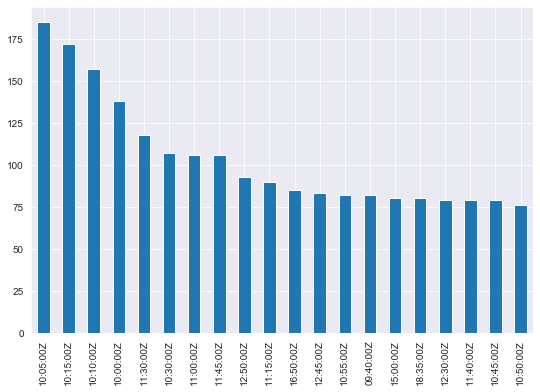

In [14]:
df['Start Hour'].value_counts().head(20).plot(kind='bar', figsize=(9,6))

Note que o período das 10 horas é o momeneto onde há mais falhas nas máquinas. 

Agora vamos analisar as zonas onde as maquinas estão localizadas, vamos ultilizar o método **"groupby"**.

In [15]:
df.groupby('Zone').mean()

,Off-line.duration
Zone,
ZoneASTE,3.329637
ZoneBMAR,4.823250
ZoneCKAS,4.358763
ZoneDSHA,5.444037
ZoneEHAD,5.148858
ZoneFMTU,3.846761
ZoneGSHO,4.469759
ZoneHASK,3.305872


As zonas 'ZoneCKAS' e 'ZoneEHAD' são as zonas com maior média de tempo de máquinas paradas, vamos analisar as razões. 

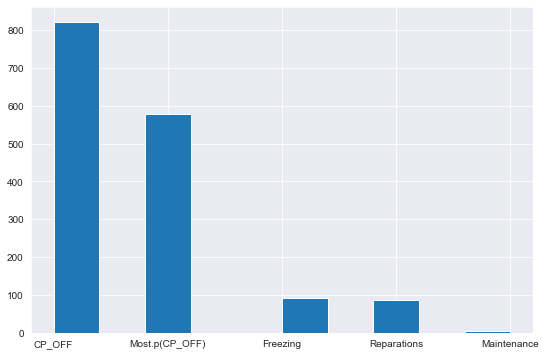

In [17]:
df[df['Zone']=='ZoneDSHA']['High.Level.Reason'].hist(figsize=(9,6))

Na 'ZoneDSHA' as maiores razões de parada são **'CP_OFF'** e **'Most.p(CP_OFF)'**. 

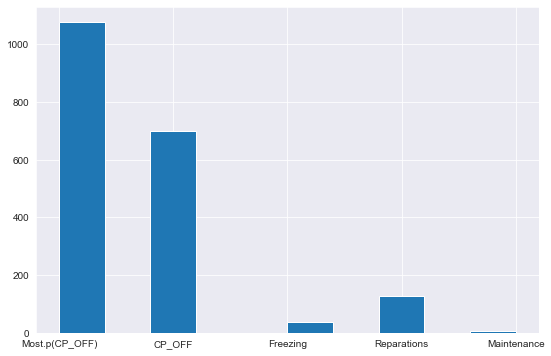

In [18]:
df[df['Zone']=='ZoneEHAD']['High.Level.Reason'].hist(figsize=(9,6))

Na "ZoneEHAD" ocorre o oposto, os maiores motivos de parada são **"Most.p(CP_OFF)"** e **"CP_OFF"**.

Vamos utlizar novamente o método "groupby", agora agrupando os dados através das razões das falhas. 

In [19]:
df.groupby('High.Level.Reason').describe()

Off-line.duration                                            \
                              count       mean        std       min       25%   
High.Level.Reason                                                               
CP_OFF                       8897.0   3.962294   5.075384  0.000000  0.850000   
Freezing                      397.0   8.526784   9.328962  0.333333  2.166667   
Maintenance                    57.0   1.698830   1.534646  0.316667  1.016667   
Most.p(CP_OFF)               5693.0   4.205900   6.385251  0.000000  0.866667   
Reparations                   582.0  10.545034  14.914413  0.216667  2.950000   

                                                    
                        50%        75%         max  
High.Level.Reason                                   
CP_OFF             2.033333   5.750000   68.216667  
Freezing           7.483333  11.850000   72.133333  
Maintenance        1.200000   1.850000    7.183333  
Most.p(CP_OFF)     1.916667   4.983333   79.166667  
Reparations        6.466667  10.383333  156.200000

Nota se que a causa **"Reparations"** possui a maior média de tempo, vamos analisar quais zonas mais estão passando por reparos, consequentemente ficando mais tempo paradas. 

In [22]:
df[df['High.Level.Reason']=='Reparations'].groupby('Zone').mean()

,Off-line.duration
Zone,
ZoneASTE,16.236111
ZoneBMAR,11.373691
ZoneCKAS,12.194422
ZoneDSHA,9.541571
ZoneEHAD,12.463888
ZoneFMTU,6.205556
ZoneGSHO,15.893333
ZoneHASK,8.898387


As zonas com maiores médias de tempo "Off-line", quando necessitam de reparos, são as zonas **"ZoneASTE"** e **"ZoneGSHO"**.	

# Conclusões:
vamos utilizar o "Describe()" feito acima, para tirar algumas conclusões. 

In [41]:
df.groupby('High.Level.Reason').describe()

Off-line.duration                                            \
                              count       mean        std       min       25%   
High.Level.Reason                                                               
CP_OFF                       8897.0   3.962294   5.075384  0.000000  0.850000   
Freezing                      397.0   8.526784   9.328962  0.333333  2.166667   
Maintenance                    57.0   1.698830   1.534646  0.316667  1.016667   
Most.p(CP_OFF)               5693.0   4.205900   6.385251  0.000000  0.866667   
Reparations                   582.0  10.545034  14.914413  0.216667  2.950000   

                                                    
                        50%        75%         max  
High.Level.Reason                                   
CP_OFF             2.033333   5.750000   68.216667  
Freezing           7.483333  11.850000   72.133333  
Maintenance        1.200000   1.850000    7.183333  
Most.p(CP_OFF)     1.916667   4.983333   79.166667  
Reparations        6.466667  10.383333  156.200000

Algo muito interessante da para se notar nestes dados. Há um número muito pequeno de manutenção das máquinas, apenas 57 casos foram registrados no sistema; poderia ser este a causa dos outros problemas... A Falta de **manutenção** ?. <br>
Há também um número significativo de congelamentos das máquinas, com a segunda maior média de tempo. <br> 
E se a empresa aumentasse o número de manutenções, será que os casos iriam diminuir ?<br><br>
**OBS:** Junto ao projeto estará o rascunho do mesmo, com algumas informações adicionais, que julguei não sendo de muito relevancia para estarem do projeto final. 